In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


import warnings 
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf 
yf.pdr_override()

In [2]:
# Set time horizon
end = dt.datetime.now()
start = end - dt.timedelta(days = 500)

# Fetch Data 
df = pdr.get_data_yahoo("NFLX", start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-29,673.059998,690.969971,671.239990,690.309998,690.309998,3825300
2021-11-01,689.059998,689.969971,676.539978,681.169983,681.169983,3110900
2021-11-02,683.109985,687.679993,673.820007,677.719971,677.719971,3888600
2021-11-03,677.270020,689.390015,677.270020,688.289978,688.289978,2334900
2021-11-04,685.890015,685.940002,665.500000,668.400024,668.400024,4865000


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-07,312.679993,314.299988,306.619995,308.470001,308.470001,4553100
2023-03-08,309.290009,311.829987,305.750000,311.790009,311.790009,3479500
2023-03-09,312.079987,312.510010,294.880005,297.779999,297.779999,7443400
2023-03-10,297.899994,298.790009,289.000000,292.760010,292.760010,5753800
2023-03-13,287.339996,299.239990,285.355011,296.959991,296.959991,3300710


In [5]:
x = df["Open"]
y = df["Close"]

In [6]:
print(x.shape)
print(y.shape)

(343,)
(343,)


In [7]:
print(x.ndim)
print(y.ndim)

1
1


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [9]:
x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 1)
(103, 1)
(240, 1)
(103, 1)


In [11]:
print(x_train.ndim)
print(x_test.ndim)
print(y_train.ndim)
print(y_test.ndim)

2
2
2
2


In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

### Training Data

In [13]:
lr.fit(x_train, y_train)

LinearRegression()

In [14]:
print(f"Linear Regression Intercept: {lr.intercept_}")
print(f"Linear Regression Coefficient: {lr.coef_}")

Linear Regression Intercept: [3.08041164]
Linear Regression Coefficient: [[0.99078211]]


In [15]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([[594.66653076],
       [358.92971937],
       [376.40710014],
       [589.23700366],
       [242.46327884],
       [377.61585553],
       [385.52230769],
       [322.67700545],
       [321.66638834],
       [175.10991495],
       [597.46048311],
       [165.52905372],
       [232.16905327],
       [293.5678221 ],
       [180.97534325],
       [237.57871515],
       [388.79187657],
       [229.60293123],
       [355.99701278],
       [589.62342319],
       [187.85137354],
       [362.93248758],
       [171.26567551],
       [387.09764762],
       [311.17400938],
       [356.42304183],
       [289.41644262],
       [194.48961068],
       [614.17503301],
       [225.17413397],
       [309.34105642],
       [627.27314353],
       [247.96212259],
       [175.4764995 ],
       [357.31473969],
       [287.38535138],
       [372.05758239],
       [201.88083679],
       [226.59094513],
       [220.87414322],
       [584.10475956],
       [248.90336258],
       [273.34595552],
       [317

In [16]:
y_pred_test = lr.predict(x_test)
y_pred_test

array([[338.67813054],
       [320.13068816],
       [177.4679661 ],
       [321.56733432],
       [647.37609086],
       [316.62331101],
       [215.40502172],
       [513.33320041],
       [227.98795154],
       [600.8786935 ],
       [447.19849429],
       [323.9650101 ],
       [177.9435524 ],
       [374.8515952 ],
       [689.04838416],
       [225.79831642],
       [275.02037971],
       [178.51820784],
       [311.77840219],
       [617.19690636],
       [323.79659407],
       [355.7096775 ],
       [271.83006009],
       [231.19809104],
       [518.36639048],
       [378.7255569 ],
       [231.98080225],
       [187.23707835],
       [243.51350546],
       [215.40502172],
       [660.16712181],
       [403.14832996],
       [535.18985143],
       [193.0827019 ],
       [232.56536007],
       [650.75469173],
       [304.26825683],
       [228.66167612],
       [368.45112098],
       [192.874631  ],
       [401.34509926],
       [516.05785122],
       [311.28301113],
       [186

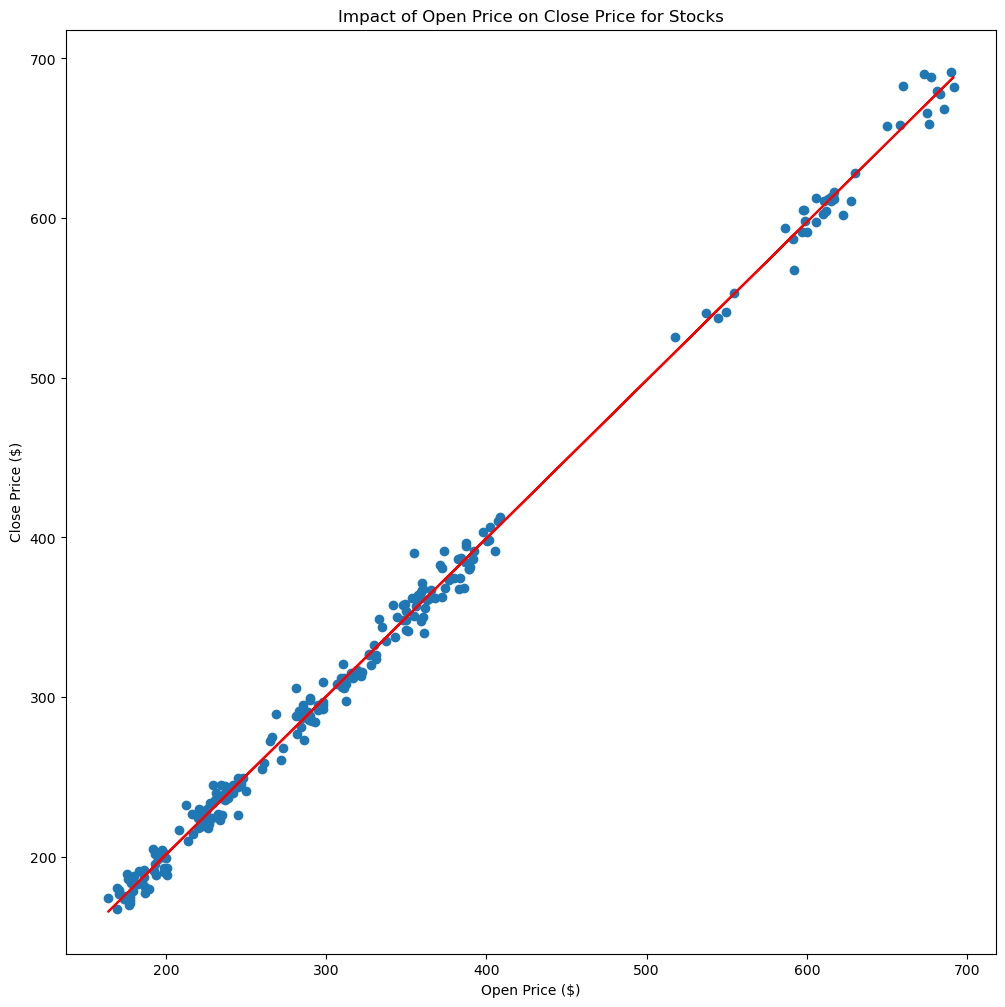

In [17]:
plt.figure(figsize=(12, 12))
plt.scatter(x_train, y_train)
plt.plot(x_train, y_pred_train, color="red")
plt.title("Impact of Open Price on Close Price for Stocks", fontsize=12)
plt.xlabel("Open Price ($)", fontsize=10)
plt.ylabel("Close Price ($)", fontsize=10)
plt.show()

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [19]:
model = ols("Open ~ Close", data =df).fit()
ANOVA = sm.stats.anova_lm(model, type=2)
ANOVA

,df,sum_sq,mean_sq,F,PR(>F)
Close,1.0,7.104178e+06,7.104178e+06,98832.72313,0.0
Residual,341.0,2.451136e+04,7.188083e+01,NaN,NaN


In [20]:
from sklearn.metrics import r2_score 

In [21]:
print(f"R-Squared Score: {r2_score(x_train, y_pred_train)}")

R-Squared Score: 0.9999149919931809


### Testing Data 

In [22]:
lr.fit(x_test, y_test)

LinearRegression()

In [23]:
print(f"Intercept: {lr.intercept_}")
print(f"Coefficient: {lr.coef_}")

Intercept: [3.27726548]
Coefficient: [[0.9852577]]


In [24]:
y_pred_test = lr.predict(x_test)
y_pred_test

array([[337.00375492],
       [318.55972956],
       [176.69246789],
       [319.98836526],
       [643.98047374],
       [315.07190889],
       [214.41799365],
       [510.68498112],
       [226.93076344],
       [597.74233708],
       [444.91902962],
       [322.37267205],
       [177.16540241],
       [372.97552317],
       [685.42041021],
       [224.75333731],
       [273.70094767],
       [177.73685368],
       [310.25401437],
       [613.96956267],
       [322.20519508],
       [353.94033719],
       [270.52841668],
       [230.1230038 ],
       [515.69010707],
       [376.82788439],
       [230.90135077],
       [186.40710942],
       [242.3697498 ],
       [214.41799365],
       [656.70018432],
       [401.11448069],
       [532.41976358],
       [192.22013887],
       [231.4826492 ],
       [647.34023617],
       [302.78574416],
       [227.60073146],
       [366.61073678],
       [192.01322813],
       [399.32130446],
       [513.39443979],
       [309.76138552],
       [185

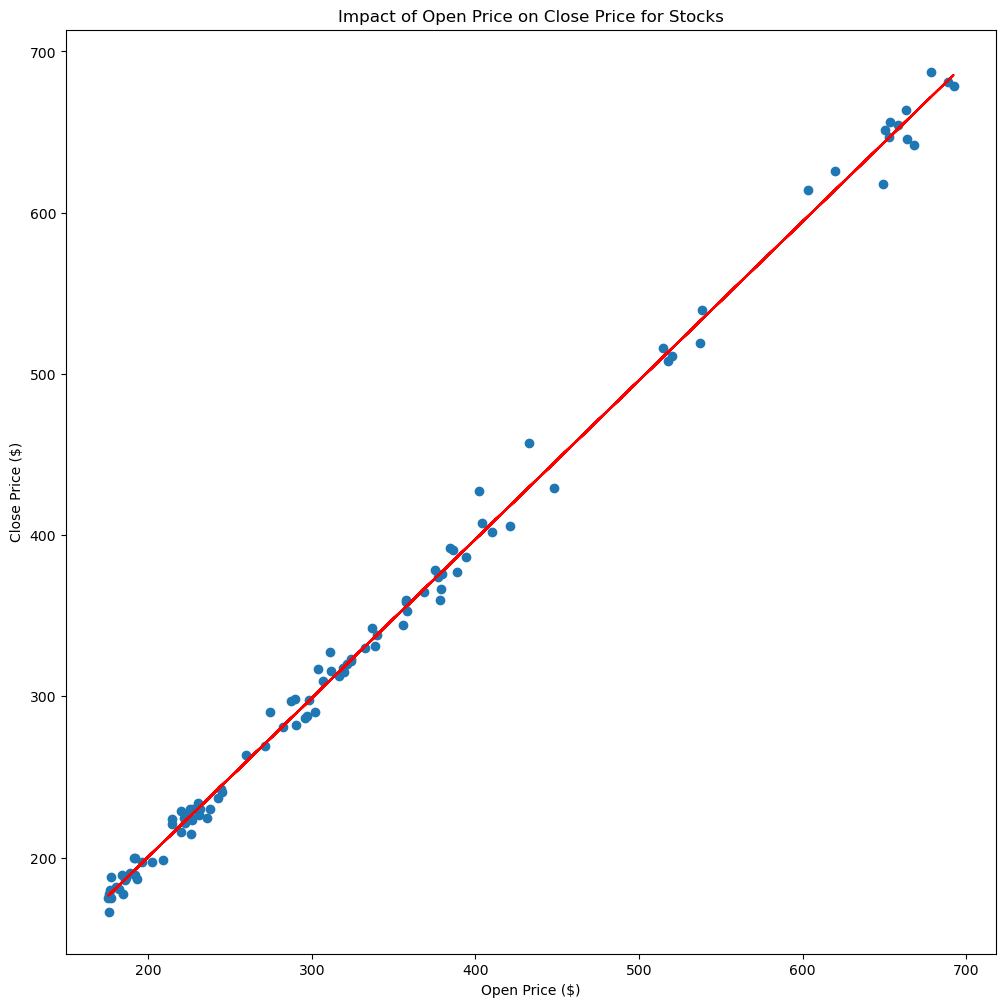

In [25]:
plt.figure(figsize=(12, 12))
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, color="red")
plt.title("Impact of Open Price on Close Price for Stocks", fontsize=12)
plt.xlabel("Open Price ($)", fontsize=10)
plt.ylabel("Close Price ($)", fontsize=10)
plt.show()

In [26]:
test_model = ols("Open ~ Close", data =df).fit()
test_ANOVA = sm.stats.anova_lm(test_model, type=2)
test_ANOVA

,df,sum_sq,mean_sq,F,PR(>F)
Close,1.0,7.104178e+06,7.104178e+06,98832.72313,0.0
Residual,341.0,2.451136e+04,7.188083e+01,NaN,NaN


In [27]:
print(f"R2-Squared Score: {r2_score(x_test, y_pred_test)}")

R2-Squared Score: 0.9996514275373711
